### Simulation of the stochastic paths of an asset

This notebook shows some approaches to generate synthetic data. This can be an alternative to backtesting and the use of historical data.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 100; mu = 0.02; vol = 0.1; N = 100; T = 1; 

#### <span style="color:#22EEFF">Geometric Brownian Motion</span>

$dS = S \mu dt + S \sigma dW_t$

$S_t = S_0 e^{(\mu-\frac{\sigma^2}{2})t+\sigma W_t}$

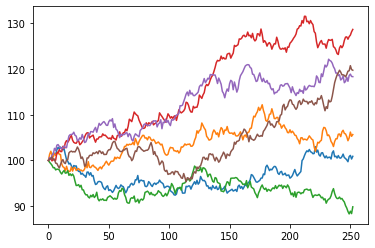

In [6]:
def GBM(S0, mu, vol, N, T, t=0, dt = 1/252):
    np.random.seed(42); step = int(1/dt)
    dW = np.random.randn(N,step)
    S = np.cumproduct(np.exp((mu-vol**2/2.0)*dt + vol*np.sqrt(dt)*dW),1)*S0
    S = np.hstack((S0*np.ones((N,1)),S))
    plt.plot(S.T[:,:6])
    
GBM(S0, mu, vol, N, T)

#### <span style="color:#22EEFF">Lévy Process (Wiener+Jumps)</span>

$\displaystyle\frac{dS_t}{S_t} = \mu dt+\sigma dW_t+\left(\displaystyle\prod_{i=1}^{dN_t}J_i-1\right)$

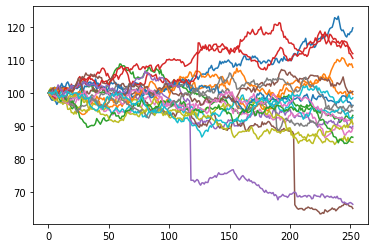

In [31]:
def Jump_Process(S0, mu, vol, N, T, lamb, k, vol_y, mu_y, t=0, dt = 1/252):
    np.random.seed(42); step = int(1/dt)
    
    #Number of Jumps given by a Poisson Process
    n = np.random.poisson(lamb, size=(N,step))
    
    temp = np.random.uniform(0,1,size=(N,int(1/dt)))
    #Size and directions of the jumps
    n_mu_y = n*np.array( [ [(1-i)/3 if i>0.5 else -i/1.6 for i in row] for row in temp ] )
    
    #Wiener Process
    dW = np.random.randn(N,int(1/dt))
    
    P = (-lamb*k+n_mu_y+n*vol_y**2/2)
    S = np.cumproduct(np.exp(P + (mu-vol**2/2.0)*dt + vol*np.sqrt(dt)*dW),1)*S0
    S = np.hstack((S0*np.ones((N,1)),S))

    plt.plot(S.T[:,:20])
    
Jump_Process(S0, mu, vol, N, T, 0.002, 0.2, 0.1, 0.10)

#### <span style="color:#22EEFF">GBM for correlated assets</span>

Consider the following vectors

$S = [S^0, S^1, S^2, \dots S^N]$

$\displaystyle\frac{dS_t^i}{S_t^i} =  \mu^i(\theta_t)\, dt + \sigma^i(\theta_t)\, dW_t^i,\quad \theta_t\in\{1,\dots,M\}$

$\mathbb{E}[(dW^i)^2]=dt$

$\mathbb{E}[dW^idW^j] = \rho\sigma^i\sigma^j$

$dV^i \sim\mathcal{N}(0,I)\quad dW^i = dV^i L^T$

$\displaystyle f_{\mathbf {X} }(x_{1},\ldots ,x_{N})={\frac {\exp \left(-{\frac {1}{2}}{\mathbf {x} }^{\mathrm {T} }{\mathbf {x} }\right)}{\sqrt {(2\pi )^{N}}}}$

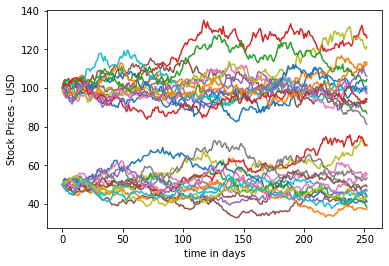

In [37]:
def GBM_MultiAsset(S0, mu, Cov, N, T, t=0, dt = 1/252):
    
    #np.random.seed(10); 
    step = int(1/dt)
    nA = len(S0) #Number of assets
    dV = np.random.multivariate_normal(np.zeros(len(mu)), np.eye(len(Cov)), (N,step))
    L = np.linalg.cholesky(Cov)
    dW = dV@L.T
    S = np.zeros((N,step+1,nA))
    for i in range(nA):
        S[:,0,i] = S0[i]
    S[:,1:,:] = np.cumproduct(np.exp(mu*dt + dW*np.sqrt(dt)),1)*S0
    plt.xlabel('time in days'); plt.ylabel('Stock Prices - USD')
    plt.plot(S.T[0,:,:15]); plt.plot(S.T[1,:,:15])
    
    #print(np.max(np.max(S[:,:,0],axis=1)))
    
S0 = np.array([100,50]); mu = np.array([0.05,0.03]); Cov = np.array([[0.04,0.0552],[0.0552,0.09]]); N = 1000; T =1

S0 = np.array([100,50]); 
mu = np.array([0.05,0.03]); 
Cov0 = np.array([[0.04,0.055],[0.055,0.09]]); 
Cov1 = np.array([[0.04,0.02],[0.02,0.09]]); 
Cov2 = np.array([[0.04,0.002],[0.002,0.09]]); 

GBM_MultiAsset(S0, mu, Cov0, N, T)
